# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


We start from the linear model

$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}, \qquad 
\mathbb{E}[\boldsymbol{\varepsilon}] = 0.
$$

The OLS estimator is

$$
\hat{\boldsymbol{\beta}}_{OLS} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
$$

Taking the expectation:

$$
\begin{aligned}
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}]
&= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbb{E}[\mathbf{y}] \\
&= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbb{E}[\mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}] \\
&= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \\
&= \boldsymbol{\beta}.
\end{aligned}
$$

Hence, the OLS estimator is **unbiased**:

$$
\mathbb{E}[\hat{\boldsymbol{\beta}}_{OLS}] = \boldsymbol{\beta}.
$$


**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


As in part a)
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon},
\qquad \mathbb{E}[\boldsymbol{\varepsilon}]=\mathbf{0}, \qquad
\mathrm{Var}(\boldsymbol{\varepsilon})=\sigma^2\mathbf{I},
$$
$\mathbf{X}^T\mathbf{X}$ is invertible so the OLS estimate:
$$
\hat{\boldsymbol{\beta}}_{OLS} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$

Write $\hat{\boldsymbol{\beta}}_{OLS}$ as a linear function of $\boldsymbol{\varepsilon}$:
$$
\hat{\boldsymbol{\beta}}_{OLS}
= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon})
= \boldsymbol{\beta} + (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\boldsymbol{\varepsilon}.
$$

Let $\mathbf{A}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$. Then
$$
\mathrm{Var}(\hat{\boldsymbol{\beta}}_{OLS})
= \mathrm{Var}\big(\mathbf{A}\boldsymbol{\varepsilon}\big)
= \mathbf{A}\,\mathrm{Var}(\boldsymbol{\varepsilon})\,\mathbf{A}^T
= \sigma^2 \mathbf{A}\mathbf{A}^T.
$$

Compute $\mathbf{A}\mathbf{A}^T$:
$$
\mathbf{A}\mathbf{A}^T
= \big((\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\big)
\big((\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\big)^T
= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}
= (\mathbf{X}^T\mathbf{X})^{-1}.
$$

Therefore
$$
\boxed{\;\mathrm{Var}(\hat{\boldsymbol{\beta}}_{OLS}) = \sigma^2(\mathbf{X}^T\mathbf{X})^{-1}\;}
$$

This shows the covariance matrix of the OLS coefficients — in particular, the diagonal entries give the variances of the individual coefficient estimates.


We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


Recall the linear model
$$
\mathbf{y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon},\qquad
\mathbb{E}[\boldsymbol{\varepsilon}]=\mathbf{0}.
$$

The Ridge estimator is
$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}
= \big(\mathbf{X}^\top\mathbf{X} + \lambda \mathbf{I}\big)^{-1}\mathbf{X}^\top\mathbf{y},
\qquad \lambda \ge 0.
$$

Substitute $\mathbf{y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}$ and take expectation:


$$
\begin{aligned}
\mathbb{E}\big[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}\big]
&= \big(\mathbf{X}^\top\mathbf{X} + \lambda \mathbf{I}\big)^{-1}\mathbf{X}^\top
\;\mathbb{E}\big[\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}\big] \\
&= \big(\mathbf{X}^\top\mathbf{X} + \lambda \mathbf{I}\big)^{-1}\mathbf{X}^\top
(\mathbf{X}\boldsymbol{\beta} + \mathbf{0}) \\
&= \big(\mathbf{X}^\top\mathbf{X} + \lambda \mathbf{I}\big)^{-1}
\big(\mathbf{X}^\top\mathbf{X}\big)\,\boldsymbol{\beta}.
\end{aligned}
$$

Therefore
$$
\boxed{\;\mathbb{E}\big[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}\big]
= \big(\mathbf{X}^\top\mathbf{X} + \lambda \mathbf{I}\big)^{-1}
\big(\mathbf{X}^\top\mathbf{X}\big)\,\boldsymbol{\beta}\;}
$$

Note: unless $\lambda=0$ this is **not equal** to $\boldsymbol{\beta}$, so the Ridge estimator is **biased**. In particular, as $\lambda\to 0$ the expression reduces to the OLS expectation $\boldsymbol{\beta}$.


**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


### Exercise 2 (b) — Variance of the Ridge estimator

Assume the linear model
$$
\mathbf{y}=\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon},\qquad
\mathbb{E}[\boldsymbol{\varepsilon}]=\mathbf{0},\qquad
\mathrm{Var}(\boldsymbol{\varepsilon})=\sigma^2\mathbf{I},
$$
and let $\lambda\ge 0$. The Ridge estimator is
$$
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}
= \big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\mathbf{y}.
$$

Write it as a linear function of $\boldsymbol{\varepsilon}$:
$$
\begin{aligned}
\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}
&= \big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}
\big(\mathbf{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon}\big) \\
&= \underbrace{\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\mathbf{X}\boldsymbol{\beta}}_{\text{deterministic}}
\;+\;
\underbrace{\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\boldsymbol{\varepsilon}}_{\text{random part}}.
\end{aligned}
$$

Let
$$
\mathbf{A} \;=\; \big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}.
$$
Then the random part is $\mathbf{A}\boldsymbol{\varepsilon}$, so
$$
\mathrm{Var}\!\left(\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}\right)
= \mathrm{Var}\!\left(\mathbf{A}\boldsymbol{\varepsilon}\right)
= \mathbf{A}\,\mathrm{Var}(\boldsymbol{\varepsilon})\,\mathbf{A}^{\top}
= \sigma^2\,\mathbf{A}\mathbf{A}^{\top}.
$$

Compute $\mathbf{A}\mathbf{A}^{\top}$:
$$
\begin{aligned}
\mathbf{A}\mathbf{A}^{\top}
&= \Big(\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\Big)
\Big(\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\Big)^{\top} \\
&= \big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\mathbf{X}^{\top}\mathbf{X}\,
\Big(\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\Big)^{\top}.
\end{aligned}
$$

Since $\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}$ is symmetric positive definite,
$$
\Big(\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\Big)^{\top}
= \big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}.
$$

Therefore
$$
\boxed{\;
\mathrm{Var}\!\left(\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}\right)
= \sigma^2\,\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}\,
\mathbf{X}^{\top}\mathbf{X}\,
\big(\mathbf{X}^{\top}\mathbf{X}+\lambda\mathbf{I}\big)^{-1}
\;}
$$

**Checks and limits.**
- If $\lambda\to 0$, this reduces to the OLS variance $\;\sigma^2(\mathbf{X}^{\top}\mathbf{X})^{-1}$.
- If $\lambda\to\infty$, the variance tends to $\mathbf{0}$ (strong shrinkage).


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$
In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.

**b)** Explain what the terms mean and discuss their interpretations.


We again assume the model
$$
y_i = f(x_i) + \varepsilon_i,\qquad \mathbb{E}[\varepsilon_i]=0,\quad \mathrm{Var}(\varepsilon_i)=\sigma^2,
$$
and let $\tilde{y}_i$ be the predictions of the model
$$
\mathbb{E}\!\left[(y_i-\tilde{y}_i)^2\right]
= \mathbb{E}\!\left[(f(x_i)+\varepsilon_i-\tilde{y}_i)^2\right].
$$

Add and subtract $\mathbb{E}[\tilde{y}_i]$:
$$
\begin{aligned}
\mathbb{E}\!\left[(y_i-\tilde{y}_i)^2\right]
&= \mathbb{E}\!\left[\big(f(x_i)-\mathbb{E}[\tilde{y}_i] + \mathbb{E}[\tilde{y}_i]-\tilde{y}_i + \varepsilon_i\big)^2\right] \\
&= \underbrace{\big(f(x_i)-\mathbb{E}[\tilde{y}_i]\big)^2}_{\text{bias}^2}
+ \underbrace{\mathbb{E}\!\left[(\tilde{y}_i-\mathbb{E}[\tilde{y}_i])^2\right]}_{\mathrm{Var}(\tilde{y}_i)}
+ \underbrace{\mathbb{E}[\varepsilon_i^2]}_{\sigma^2} \\
&\quad +\; \underbrace{2\,(f(x_i)-\mathbb{E}[\tilde{y}_i])\,\mathbb{E}[\tilde{y}_i-\mathbb{E}[\tilde{y}_i]]}_{=\,0}
\;+\; \underbrace{2\,\mathbb{E}[(\tilde{y}_i-\mathbb{E}[\tilde{y}_i])\,\varepsilon_i]}_{=\,0}.
\end{aligned}
$$

The cross-terms vanish because $\mathbb{E}[\tilde{y}_i-\mathbb{E}[\tilde{y}_i]]=0$ and, at test time, $\tilde{y}_i$ is independent of $\varepsilon_i$ with $\mathbb{E}[\varepsilon_i]=0$. Therefore,
$$
\boxed{\;
\mathbb{E}\!\left[(y_i-\tilde{y}_i)^2\right]
= \big(f(x_i)-\mathbb{E}[\tilde{y}_i]\big)^2 \;+\; \mathrm{Var}(\tilde{y}_i) \;+\; \sigma^2
\;}
$$

Averaging over all points $i=1,\dots,n$ yields the dataset-level decomposition:
$$
\boxed{\;
\frac{1}{n}\sum_{i=1}^n \mathbb{E}\!\left[(y_i-\tilde{y}_i)^2\right]
= \frac{1}{n}\sum_{i=1}^n \big(f(x_i)-\mathbb{E}[\tilde{y}_i]\big)^2
\;+\; \frac{1}{n}\sum_{i=1}^n \mathrm{Var}(\tilde{y}_i) \;+\; \sigma^2
\;}
$$

**Interpretation of terms (brief):**
- Bias $^2$ : shows how far our model´s average prediction is from the actual function. High bias - underfitting (model not good enough)
- Variance: sensitivity of the model when trained on different data drawn from same distribution. High variance - model is sensitive to noise (overfitting)
- $\sigma^2$: irreducible error caused by randomness in the data-generating process .


## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [2]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
targets = np.random.rand(bootstraps, n)

yhat_mean = predictions.mean(axis=0)
y_mean = targets.mean(axis=0)

mse = np.mean((targets - predictions)**2)

bias = bias = np.mean((y_mean - yhat_mean)**2)

variance = variance = np.mean(np.var(predictions, axis=0, ddof=0))

noise = np.mean(np.var(targets, axis=0, ddof=0))

print(f"MSE       : {mse:.6f}")
print(f"Bias^2    : {bias:.6f}")
print(f"Variance  : {variance:.6f}")
print(f"Noise     : {noise:.6f}")
print(f"Bias^2 + Variance + Noise = {bias + variance + noise:.6f}")
print(f"Difference (MSE - sum)    = {mse - (bias + variance + noise):.6e}")

MSE       : 218.804291
Bias^2    : 210.444417
Variance  : 8.278685
Noise     : 0.083330
Bias^2 + Variance + Noise = 218.806432
Difference (MSE - sum)    = -2.140765e-03


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


In [ ]:
yhat_mean = predictions.mean(axis=0)                       
offset = 5.0                                               
pred_b = np.tile(yhat_mean, (bootstraps, 1)) + offset

pred_b += np.random.normal(0, 1e-3, size=pred_b.shape)

mse_b  = np.mean((targets - pred_b)**2)
bias_b = np.mean((targets.mean(axis=0) - pred_b.mean(axis=0))**2)
var_b  = np.mean(np.var(pred_b, axis=0, ddof=0))

print("=== 4(b) Increase bias, decrease variance ===")
print(f"Baseline:   MSE={mse:.6f}  Bias^2={bias:.6f}  Var={variance:.6f}")
print(f"Modified b: MSE={mse_b:.6f} Bias^2={bias_b:.6f} Var={var_b:.6f}")
print(f"(Expect Bias^2 ↑ and Var ↓ compared to baseline.)")

=== 4(b) Increase bias, decrease variance ===
Baseline:   MSE=218.804291  Bias^2=210.444417  Var=8.278685
Modified b: MSE=380.591922 Bias^2=380.508592 Var=0.000001
(Expect Bias^2 ↑ and Var ↓ compared to baseline.)


In [ ]:
yhat_mean = predictions.mean(axis=0)     
y_mean    = targets.mean(axis=0)         
delta     = y_mean - yhat_mean           

gamma = 2.0  

pred_c = (yhat_mean + delta)[None, :] + gamma * (predictions - yhat_mean[None, :])

mse_c  = np.mean((targets - pred_c)**2)
bias_c = np.mean((targets.mean(axis=0) - pred_c.mean(axis=0))**2)
var_c  = np.mean(np.var(pred_c, axis=0, ddof=0))

print("=== 4(c) Increase variance, decrease bias ===")
print(f"Baseline:   MSE={mse:.6f}  Bias^2={bias:.6f}  Var={variance:.6f}")
print(f"Modified c: MSE={mse_c:.6f} Bias^2={bias_c:.6f} Var={var_c:.6f}")
print(f"(Expect Bias^2 ↓ and Var ↑ compared to baseline.)")

=== 4(c) Increase variance, decrease bias ===
Baseline:   MSE=218.804291  Bias^2=210.444417  Var=8.278685
Modified c: MSE=33.193788 Bias^2=0.000000 Var=33.114740
(Expect Bias^2 ↓ and Var ↑ compared to baseline.)


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

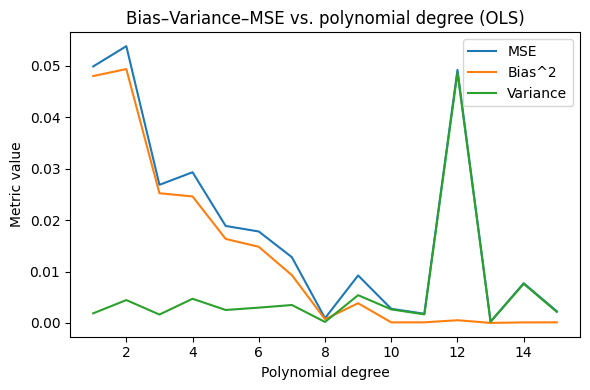

In [11]:
n = 100
bootstraps = 1000

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []

def _bvm(predictions, targets):
    preds = np.asarray(predictions)
    targs = np.asarray(targets)
    mse = np.mean((targs - preds) ** 2)
    mean_pred = preds.mean(axis=0)
    bias2 = np.mean((targs[0, :] - mean_pred) ** 2)  
    var = np.mean(np.var(preds, axis=0, ddof=0))
    return mse, bias2, var

degrees = range(1, 16)

X = x.reshape(-1, 1)
rng = np.random.RandomState(0)

for p in degrees:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng.randint(10_000))
    
    poly = PolynomialFeatures(degree=p, include_bias=True)
    X_test_poly = poly.fit_transform(X_test)  

    predictions = np.empty((bootstraps, len(y_test)))
    targets = np.broadcast_to(y_test[None, :], (bootstraps, len(y_test)))

    for b in range(bootstraps):
        X_tr_b, y_tr_b = resample(X_train, y_train, replace=True, random_state=b)

        X_tr_b_poly = poly.fit_transform(X_tr_b)

        model = LinearRegression(fit_intercept=False)  
        model.fit(X_tr_b_poly, y_tr_b)
        y_pred = model.predict(X_test_poly)

        predictions[b, :] = y_pred

    mse_p, bias2_p, var_p = _bvm(predictions, targets)
    mses.append(mse_p); biases.append(bias2_p); variances.append(var_p)


plt.figure(figsize=(6,4))
plt.plot(list(degrees), mses,     label="MSE")
plt.plot(list(degrees), biases,   label="Bias^2")
plt.plot(list(degrees), variances,label="Variance")
plt.xlabel("Polynomial degree"); plt.ylabel("Metric value")
plt.title("Bias–Variance–MSE vs. polynomial degree (OLS)")
plt.legend(); plt.tight_layout(); plt.show()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


Low polynomial degrees (underfitting) - the model is too simple to capture the curved signal. Results in high bias and low variance.

Intermediate degrees (sweet spot) - When degree increases, the model fits the data more flexibly. Bias is lower and variace gets higher. MSE is minimal here

High polynomial degrees (overfitting) - small changes in the training sample cause large coefficient swings. Variance becomes large, and MSE increases

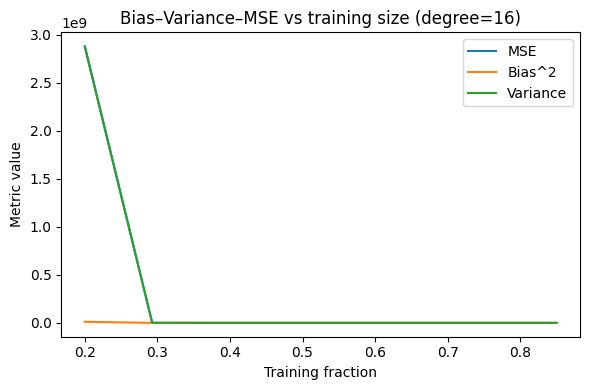

In [12]:
def run_one_degree(x, y, degree, bootstraps=500, train_frac=0.7, seed=0):
    X = x.reshape(-1, 1)
    rng = np.random.RandomState(seed)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_frac, random_state=rng.randint(10_000))

    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_test_poly = poly.fit_transform(X_test)

    predictions = np.empty((bootstraps, len(y_test)))
    targets = np.broadcast_to(y_test[None, :], (bootstraps, len(y_test)))

    for b in range(bootstraps):
        X_tr_b, y_tr_b = resample(X_train, y_train, replace=True, random_state=b)
        X_tr_b_poly = poly.fit_transform(X_tr_b)

        model = LinearRegression(fit_intercept=False)
        model.fit(X_tr_b_poly, y_tr_b)
        predictions[b, :] = model.predict(X_test_poly)

    mse, bias2, var = _bvm(predictions, targets)
    return mse, bias2, var

deg_star = int(np.argmin(mses)) + 1           
deg_for_size = max(deg_star + 3, 3)

train_fracs = np.linspace(0.2, 0.85, 8)
mse_sz, bias2_sz, var_sz = [], [], []

for frac in train_fracs:
    m, b2, v = run_one_degree(x, y, degree=deg_for_size, bootstraps=500, train_frac=float(frac), seed=42)
    mse_sz.append(m); bias2_sz.append(b2); var_sz.append(v)

plt.figure(figsize=(6,4))
plt.plot(train_fracs, mse_sz,   label="MSE")
plt.plot(train_fracs, bias2_sz, label="Bias^2")
plt.plot(train_fracs, var_sz,   label="Variance")
plt.xlabel("Training fraction"); plt.ylabel("Metric value")
plt.title(f"Bias–Variance–MSE vs training size (degree={deg_for_size})")
plt.legend(); plt.tight_layout(); plt.show()

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

We scale our features due to several reasons but the main is fair contribution of the features. If there is a big difference in the value of the features it is hard to compare them.

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

OLS fits the line that minimizes the squared error and scaling just rescales the coefficient. Either way, the y (target values) remain unchanged. 

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

As we know Ridge minimizes the penalized loss. The model shrinks features unevenly, and the relative importance of features depends on their units, not on their true contribution.

**d)** Why do we say that the Ridge method gives a biased model?

We say Ridge gives a biased model because the regularization term shrinks the regression coefficients toward zero, which systematically shifts predictions away from the true values.

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

The MSE of the OLS method is not affected by scaling the feature matrix, because scaling features only rescales the coefficients and leaves predictions unchanged.
However, the MSE is affected by scaling the target data, since the residuals scale with the targets, and the squared errors therefore scale quadratically with the target transformation.

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

The score of the OLS method is not affected by scaling of the feature matrix, because scaling features only rescales coefficients while predictions remain unchanged.
It is also not affected by scaling of the target data, because both the residual sum of squares and the total sum of squares scale in the same way, leaving their ratio unchanged.

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

1: perfect fit, all variance explained (in practice this is overfitting unless there´s isn´t noise)

0.5: model explains half of the variance, moderately good fit.

0: model explains none of the variance, no better than predicting the mean.

**h)** What is an advantage of the R2 score over the MSE?

The main advantage of R^2 over MSE is that it does not depend on the scale of the data and is easy to understand as “the fraction of variation explained by the model.” MSE, on the other hand, changes with the units of the target variable and is harder to compare.
